In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import time

from train_models import *
from evaluate_models import *
from manipulate_data import *

In [2]:
model_names = ['ARMA', 'LSTM', 'GRU']

frequencies = ['D', '60min', '15min', '5min', 'min']
frequencies_number_of_samples = np.multiply([1, 7, 26, 78, 390], 252)

predictions, returns, dates, number_of_study_periods = append_periods(model_names, frequencies, frequencies_number_of_samples)

Frequency: D
Frequency: 60min
Frequency: 15min
Frequency: 5min
Frequency: min


In [3]:
# directional_accuracy = calculate_directional_accuracy(model_names, frequencies, frequencies_number_of_samples)
# vis_directional_accuracy(directional_accuracy, frequencies, model_names)

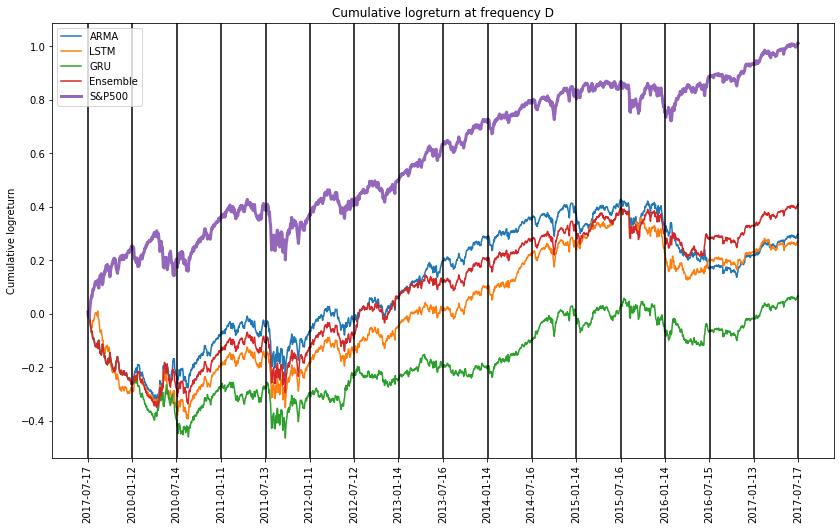

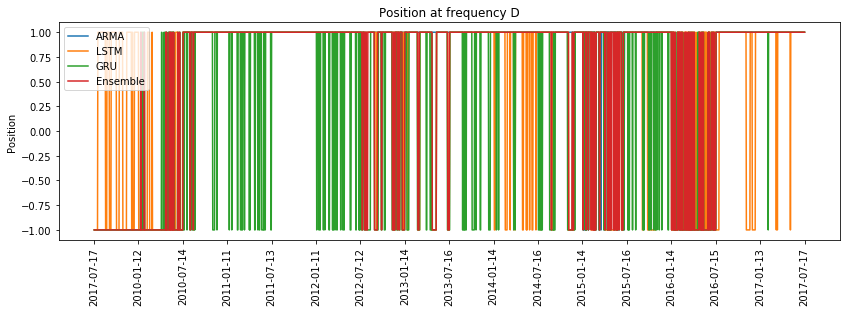

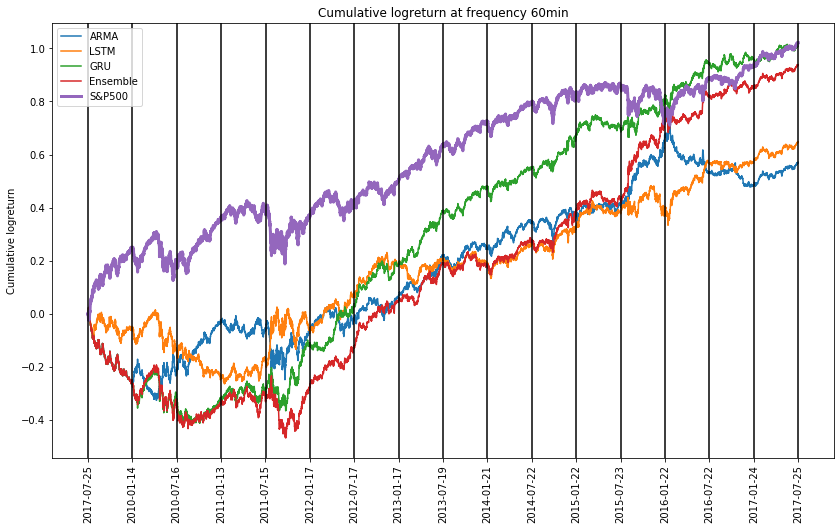

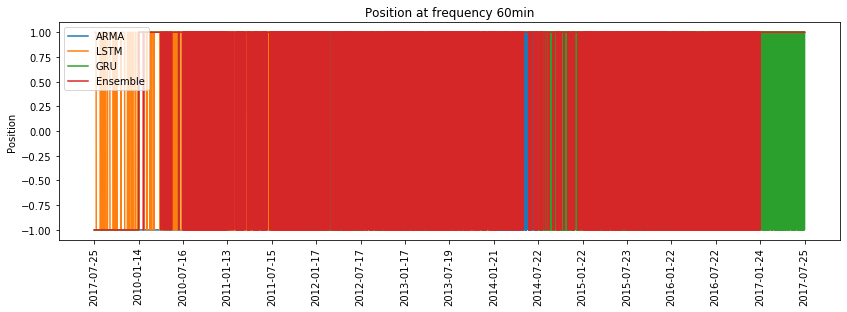

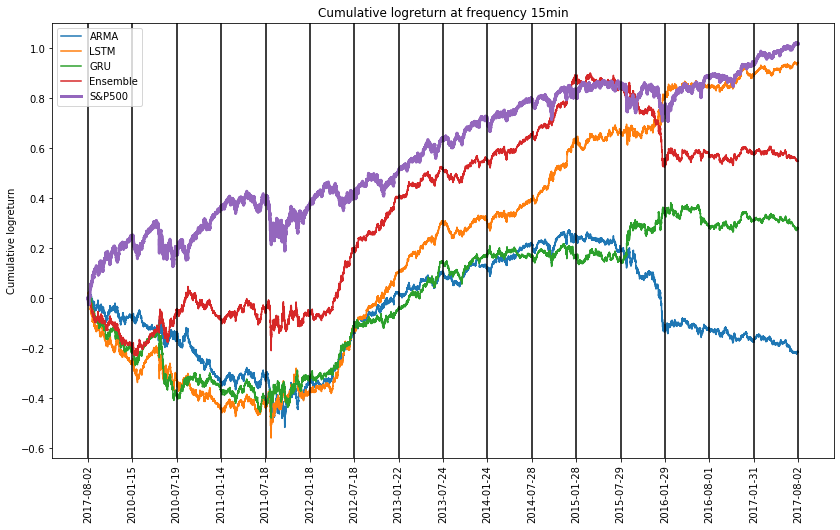

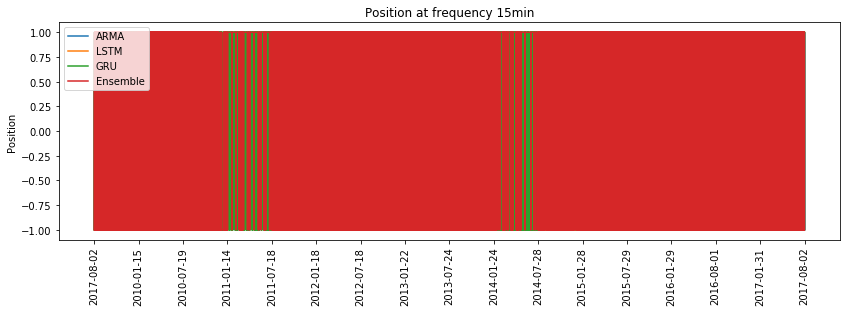

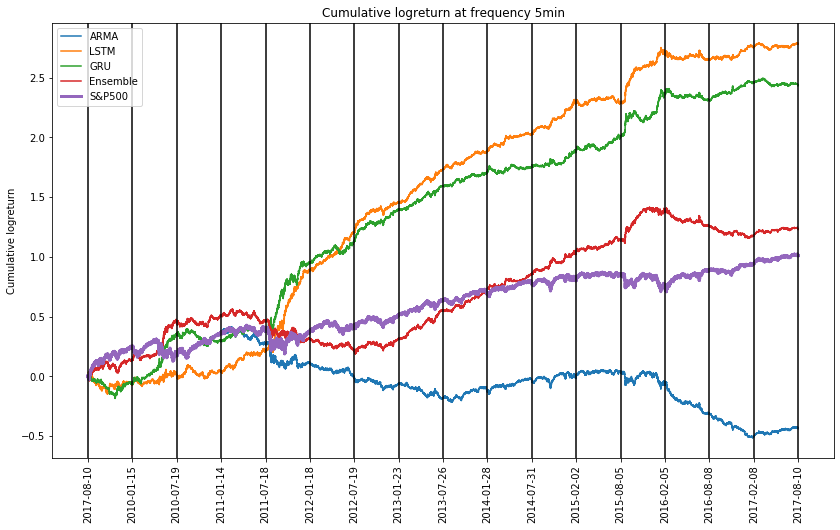

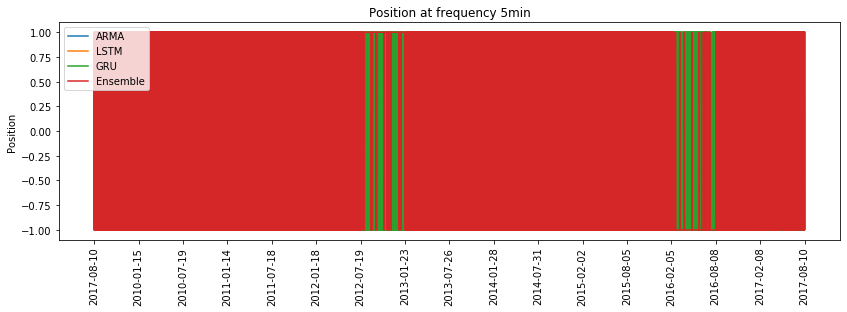

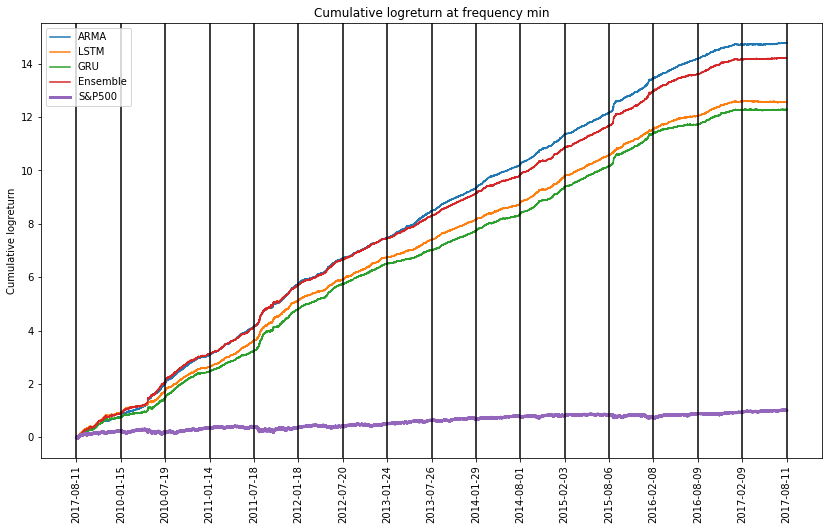

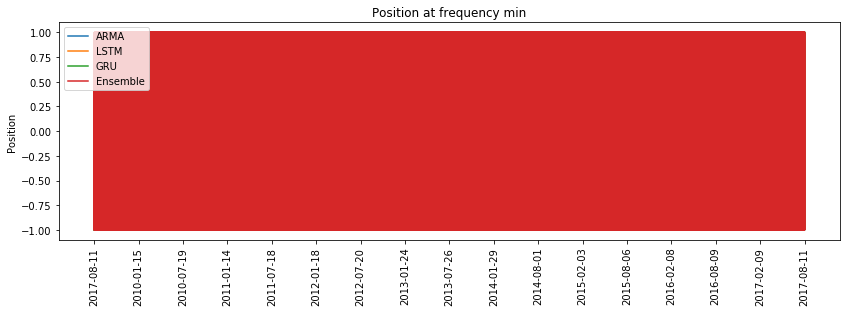

[0.02163528 0.02012702 0.00812165 0.02814142 0.06370267]
[0.01425372 0.01598082 0.02403149 0.02240591 0.02423947]
[-0.00160266  0.01155716  0.00401451  0.00709408  0.0124295 ]
[-0.00241814  0.01885569  0.01658209  0.00859844  0.00714943]
[0.04596168 0.03904583 0.03821339 0.04423485 0.00330787]


In [4]:
transaction_cost = 0
trading_strategy = calculate_trading_strategy(predictions, transaction_cost)
cum_logr = create_cum_logr(trading_strategy, returns, transaction_cost)
vis_cum_logr(cum_logr, returns, trading_strategy, frequencies, dates, number_of_study_periods)
shapre_ratios = create_shapre_ratio(cum_logr, returns)

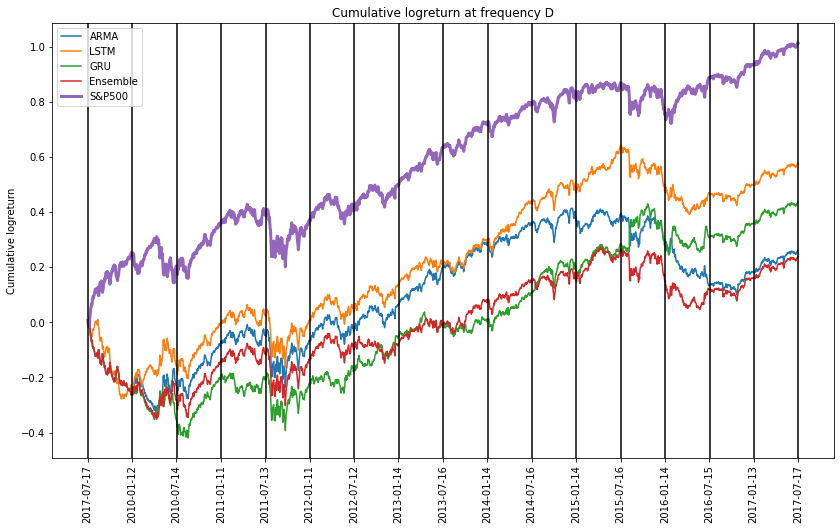

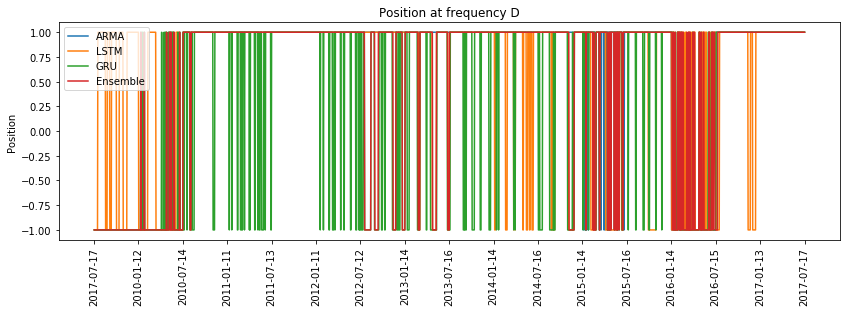

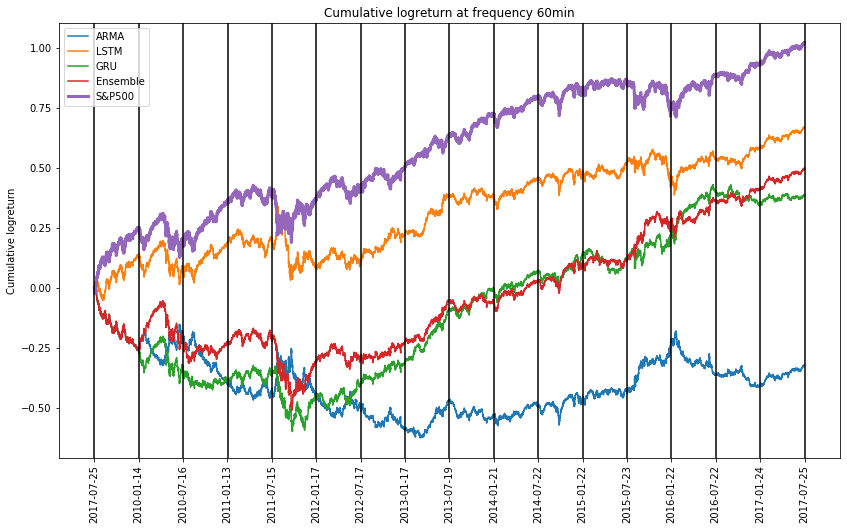

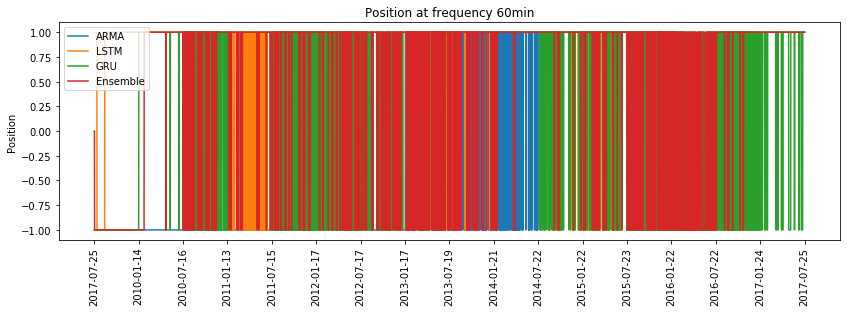

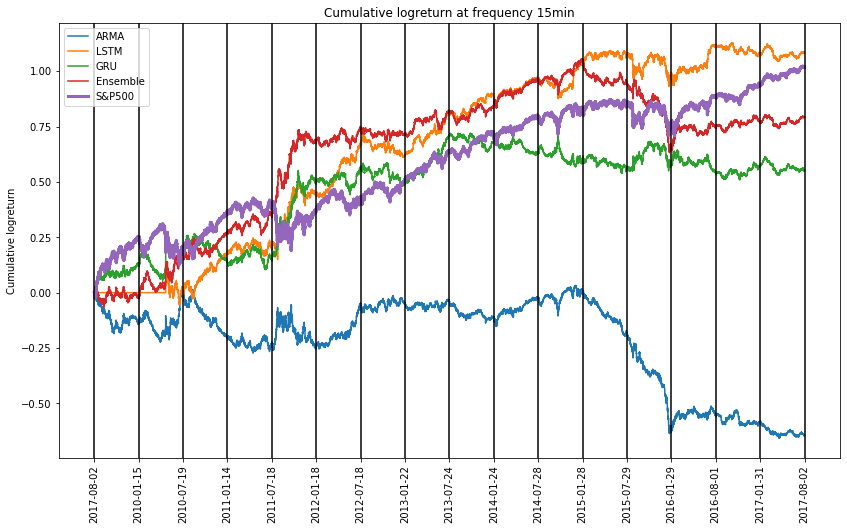

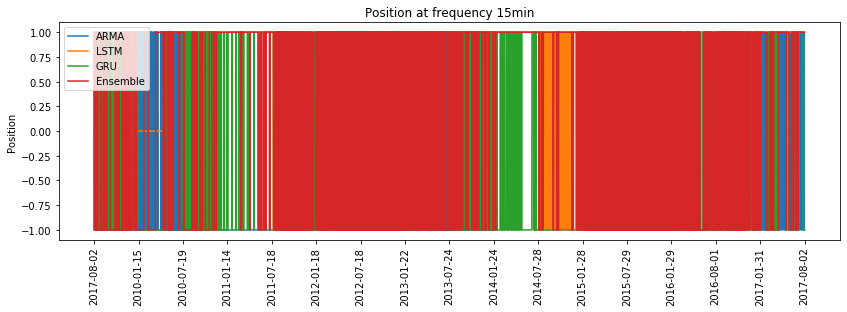

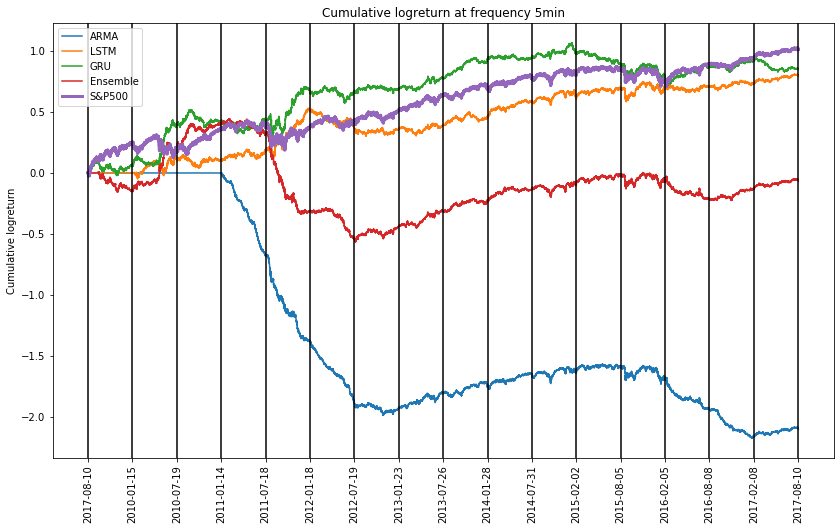

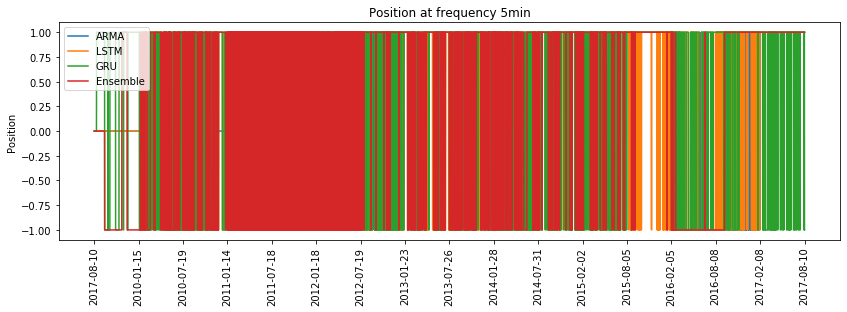

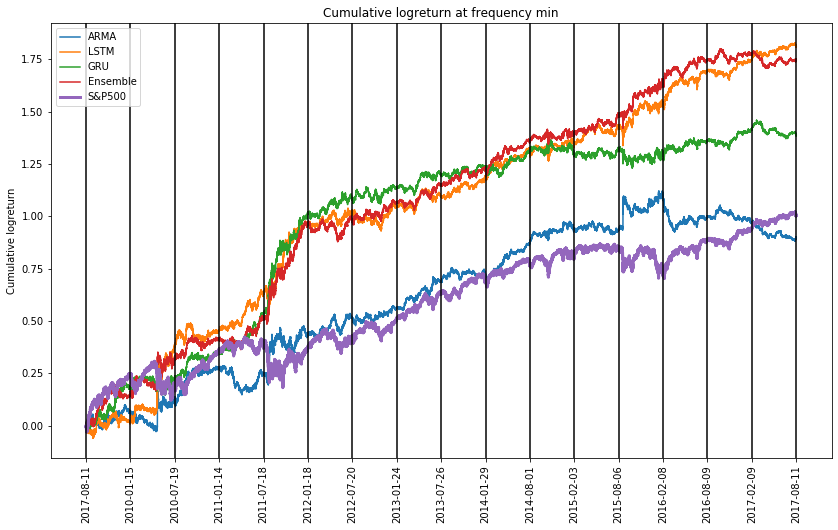

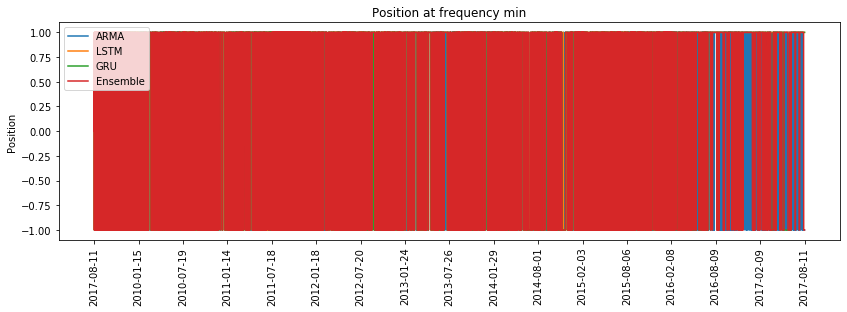

[0.01952428 0.03807554 0.02978619 0.01817856 0.06370267]
[-0.00555357  0.01644365  0.01016613  0.01264359  0.02423947]
[-0.00648936  0.01408086  0.0071472   0.00985358  0.0124295 ]
[-1.58694474e-02  5.94561404e-03  6.12361719e-03  5.37554051e-05
  7.14942540e-03]
[0.00298708 0.00580587 0.00449524 0.0056173  0.00330787]


In [5]:
transaction_cost = 0.0001
trading_strategy = calculate_trading_strategy(predictions, transaction_cost)
cum_logr = create_cum_logr(trading_strategy, returns, transaction_cost)
vis_cum_logr(cum_logr, returns, trading_strategy, frequencies, dates, number_of_study_periods)
shapre_ratios = create_shapre_ratio(cum_logr, returns)

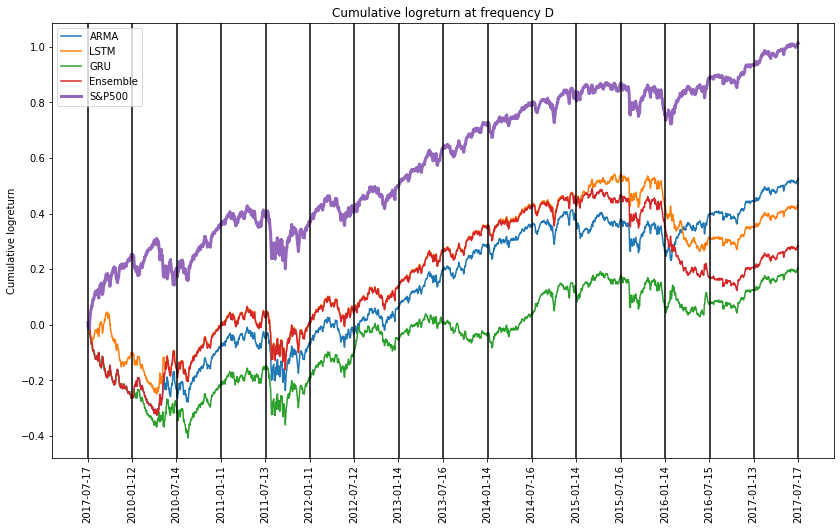

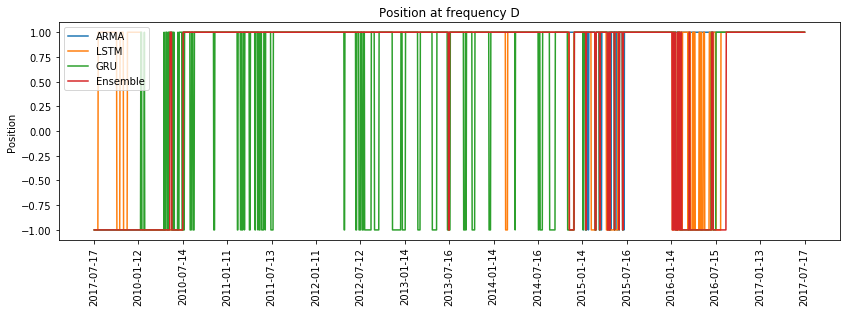

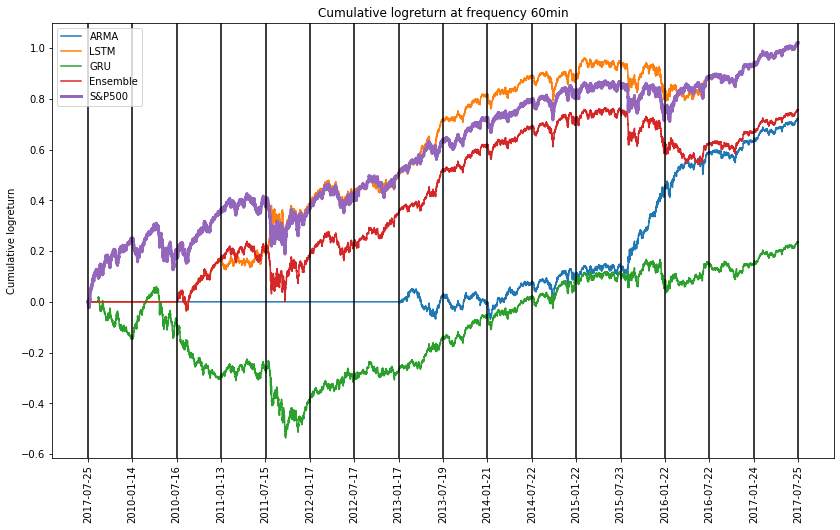

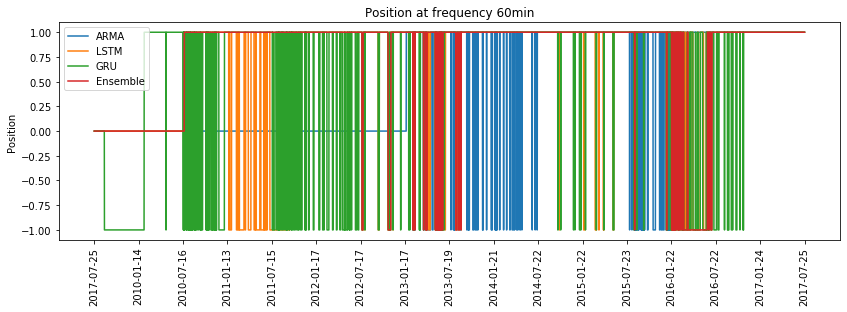

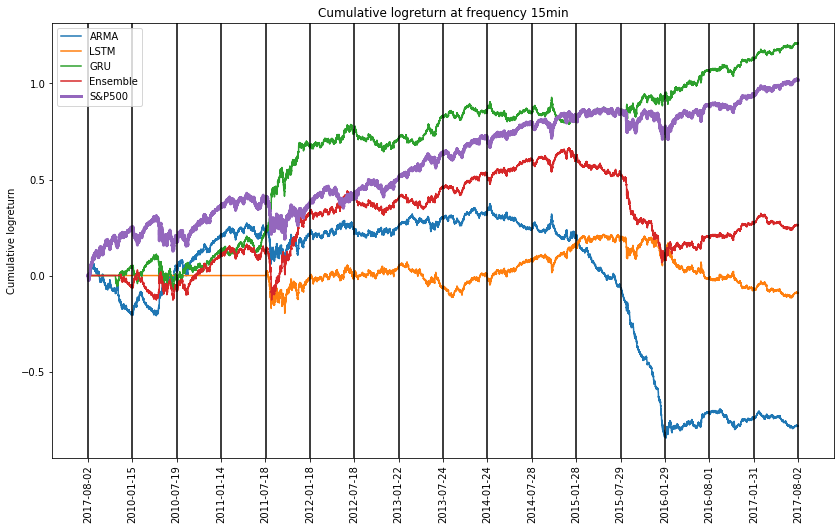

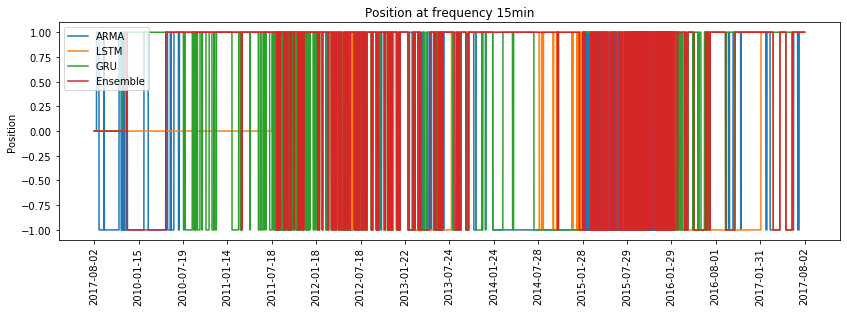

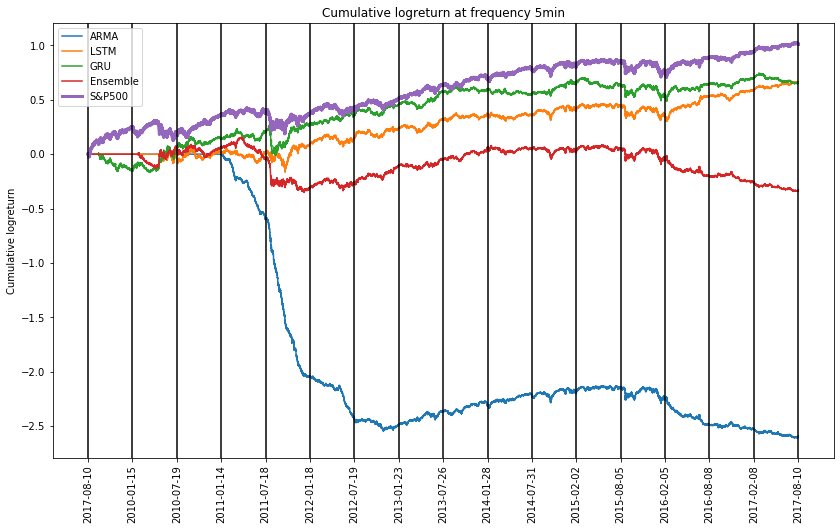

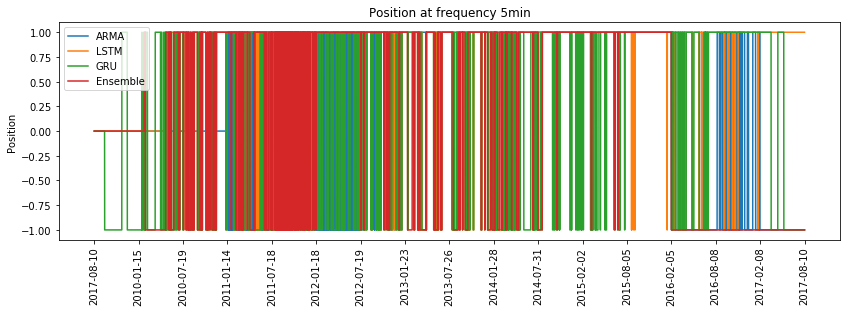

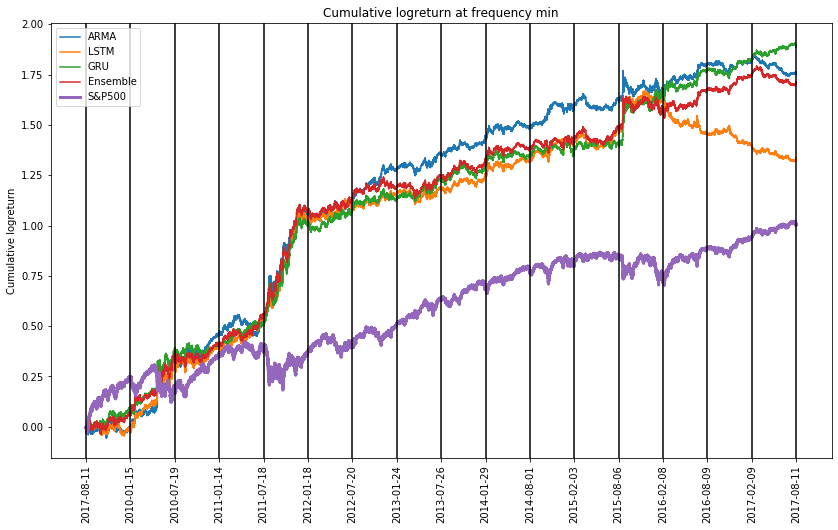

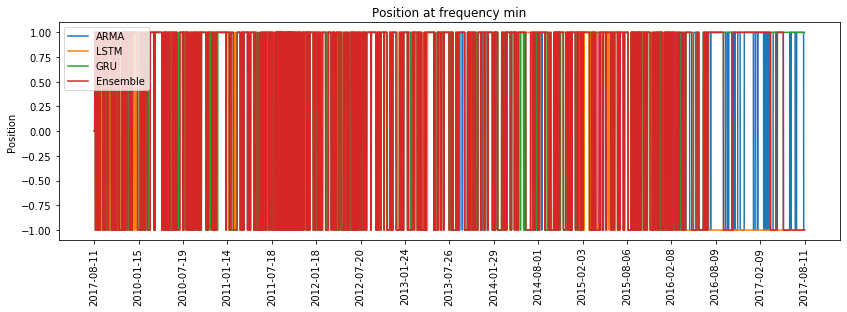

[0.03488348 0.02945346 0.01610885 0.02086547 0.06370267]
[0.02707612 0.02668327 0.00690292 0.02021342 0.02423947]
[-0.00811671 -0.00061837  0.01495996  0.00388044  0.0124295 ]
[-0.01961593  0.00509001  0.00490938 -0.00180816  0.00714943]
[0.00566736 0.00433897 0.00605926 0.00551036 0.00330787]


In [6]:
transaction_cost = 0.0003
trading_strategy = calculate_trading_strategy(predictions, transaction_cost)
cum_logr = create_cum_logr(trading_strategy, returns, transaction_cost)
vis_cum_logr(cum_logr, returns, trading_strategy, frequencies, dates, number_of_study_periods)
shapre_ratios = create_shapre_ratio(cum_logr, returns)

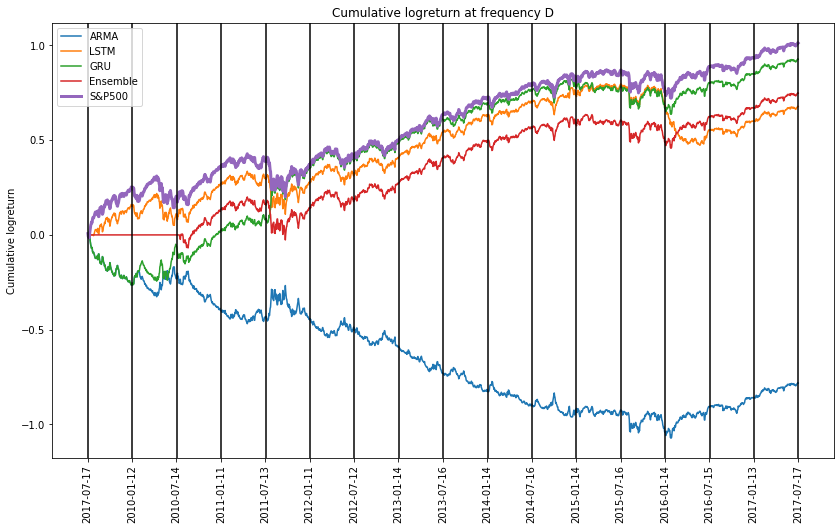

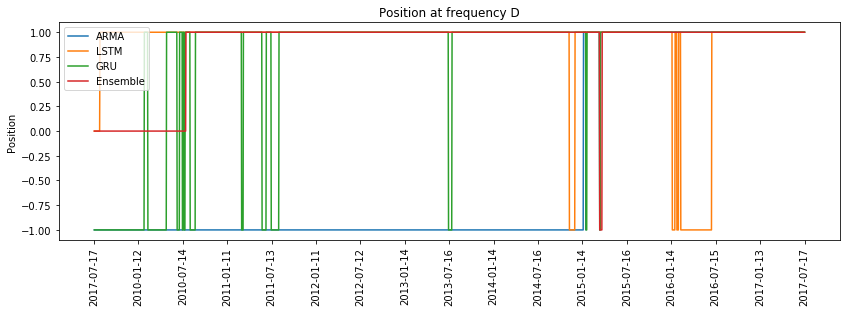

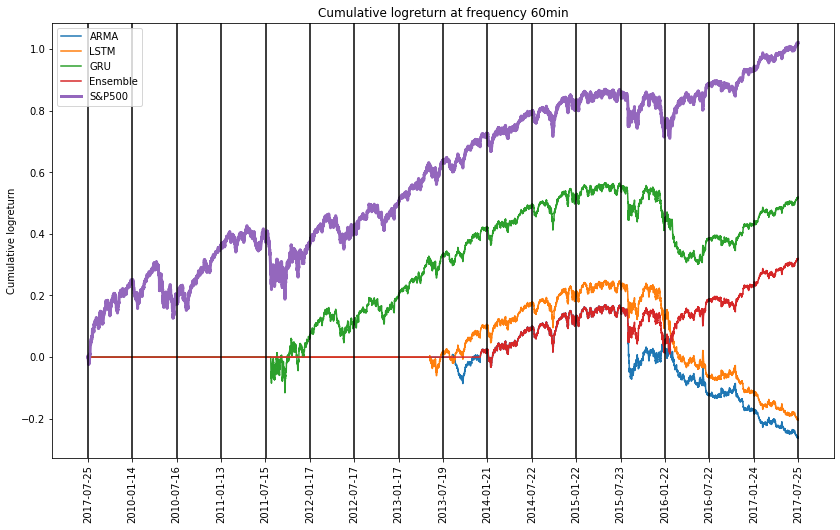

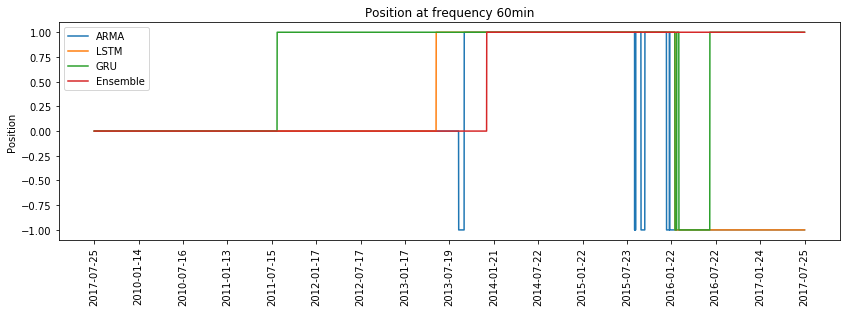

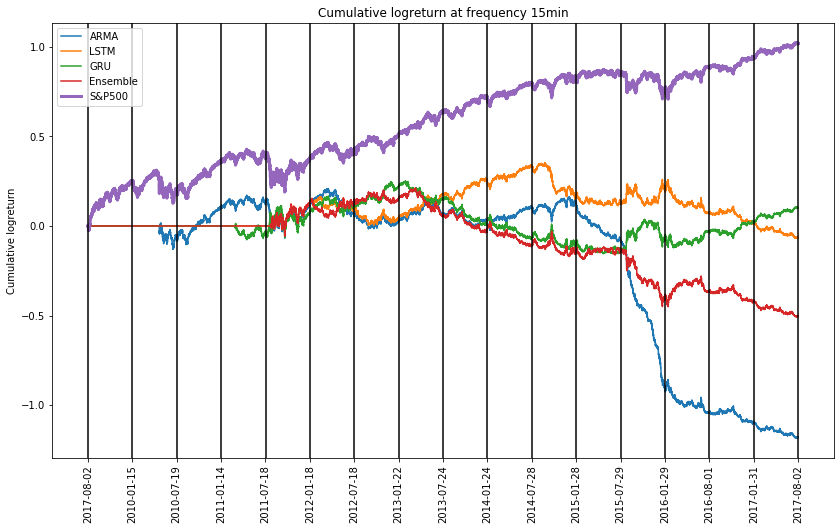

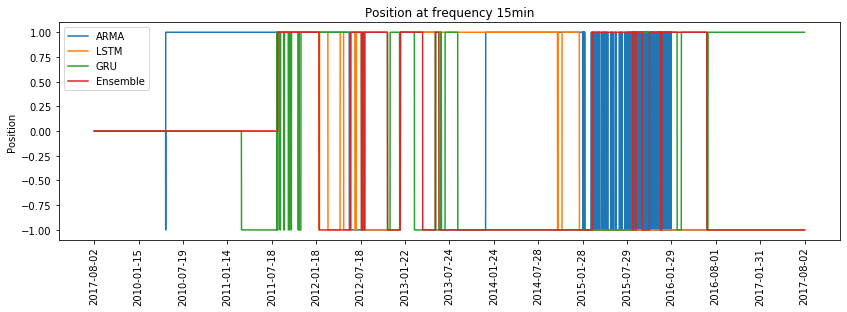

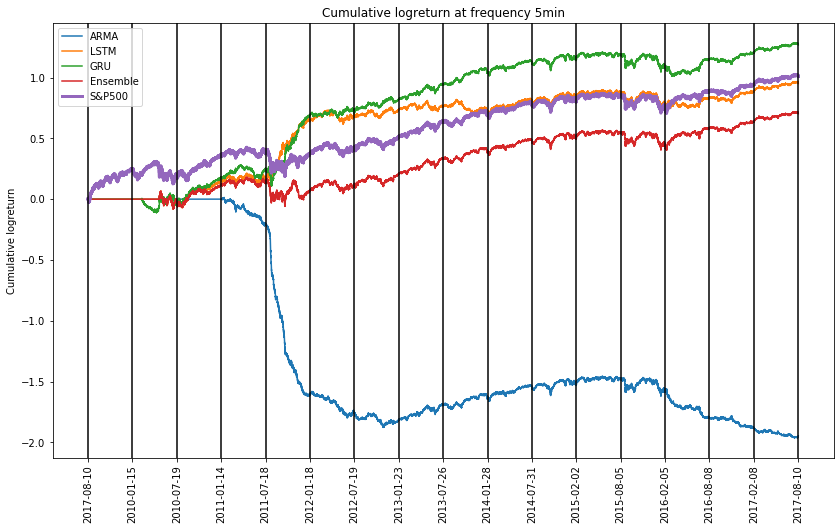

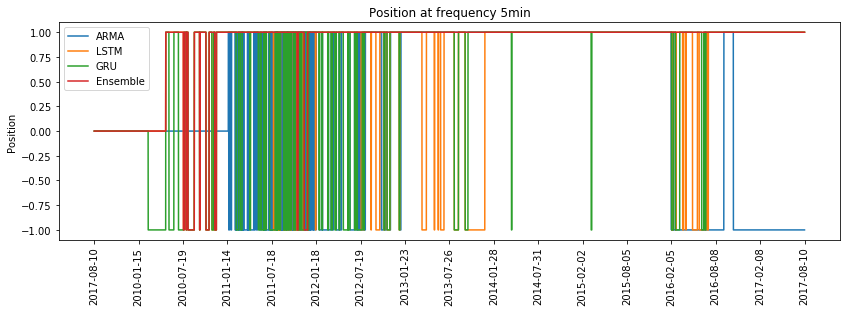

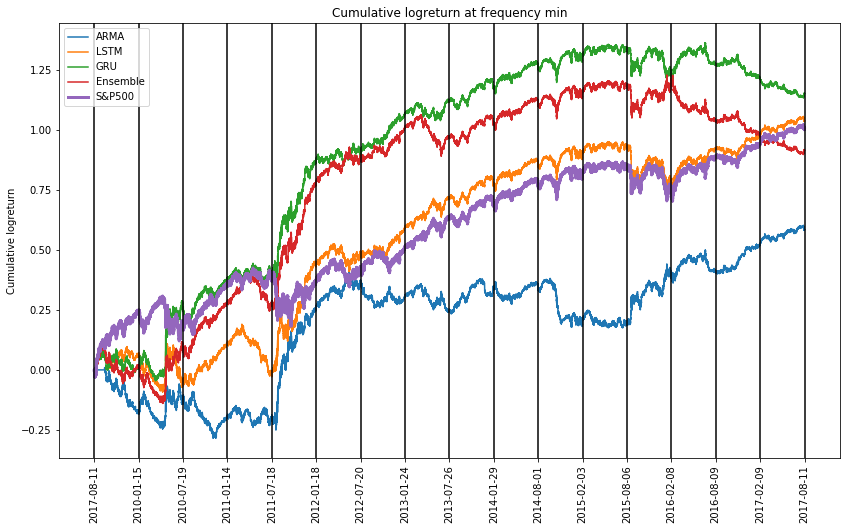

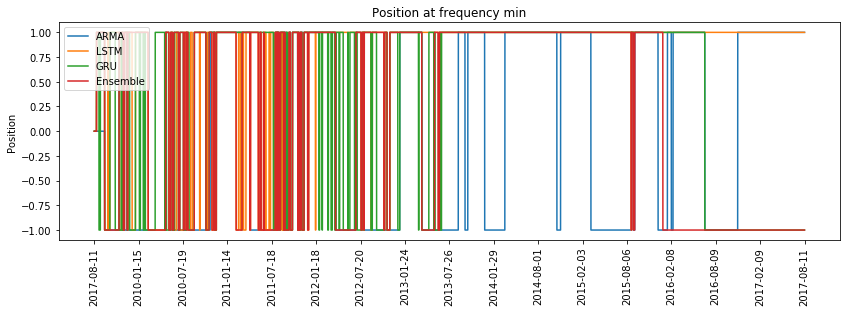

[-0.0415766   0.04425596  0.0587241   0.05279631  0.06370267]
[-0.00916539 -0.00663636  0.01547772  0.01354447  0.02423947]
[-0.01360422 -0.00026512  0.00207561 -0.00663673  0.0124295 ]
[-0.01451526  0.00723382  0.00933535  0.00546125  0.00714943]
[0.0020317  0.00342866 0.00378212 0.00305031 0.00330787]


In [7]:
transaction_cost = 0.001
trading_strategy = calculate_trading_strategy(predictions, transaction_cost)
cum_logr = create_cum_logr(trading_strategy, returns, transaction_cost)
vis_cum_logr(cum_logr, returns, trading_strategy, frequencies, dates, number_of_study_periods)
shapre_ratios = create_shapre_ratio(cum_logr, returns)

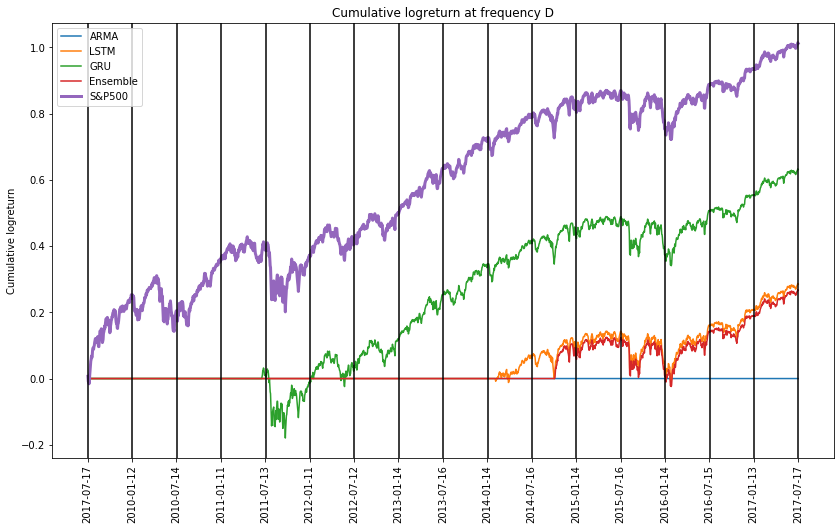

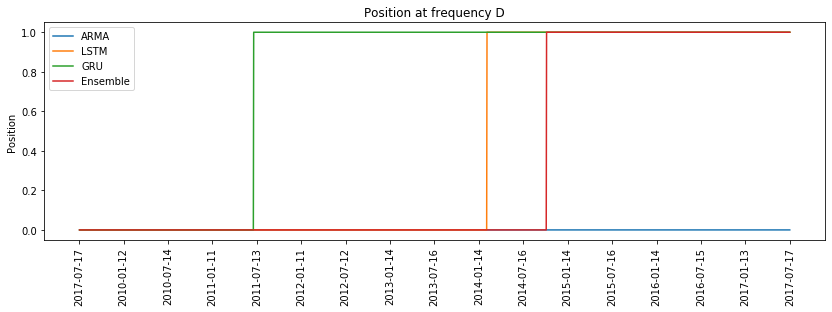

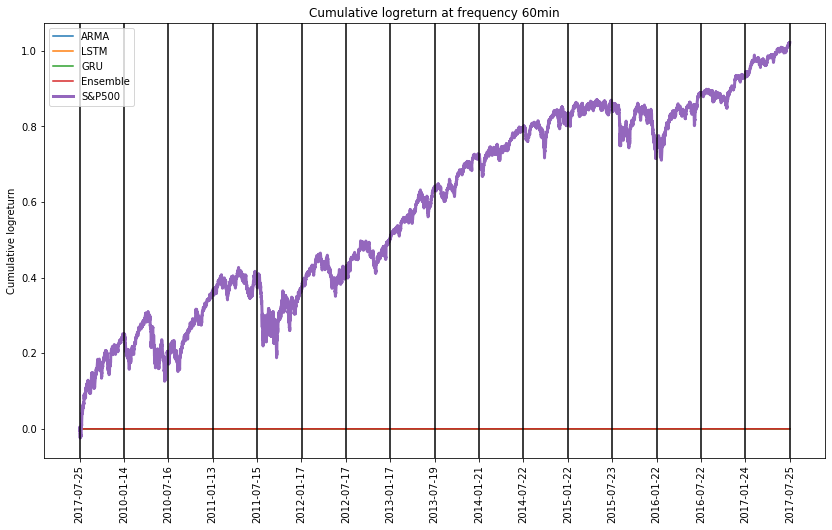

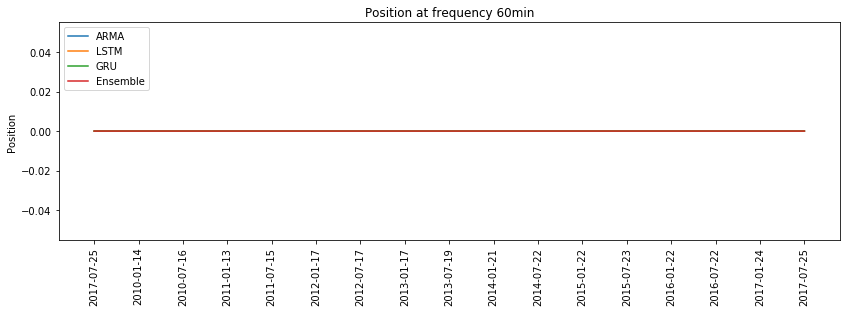

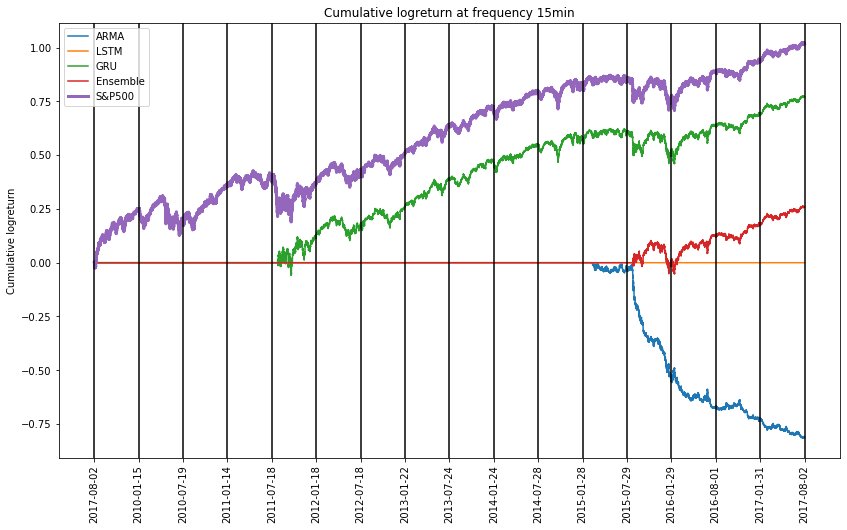

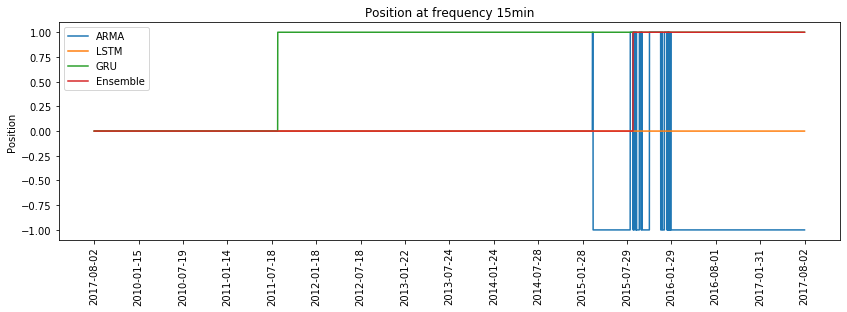

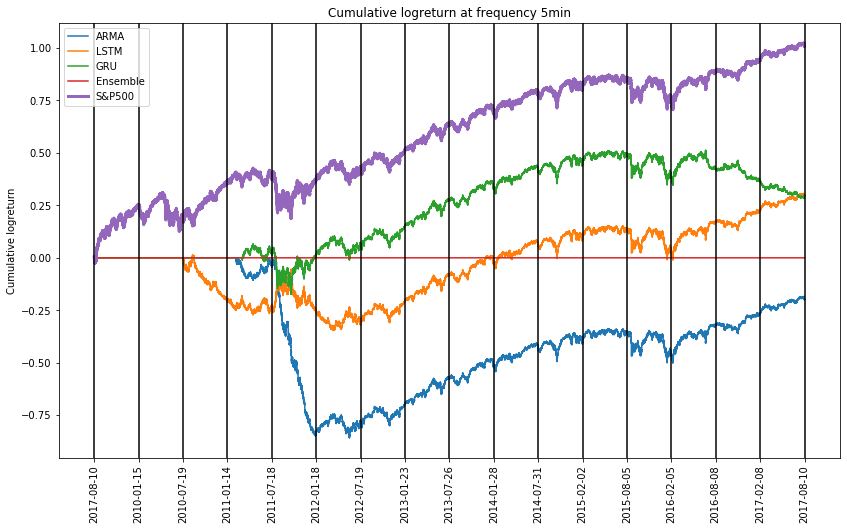

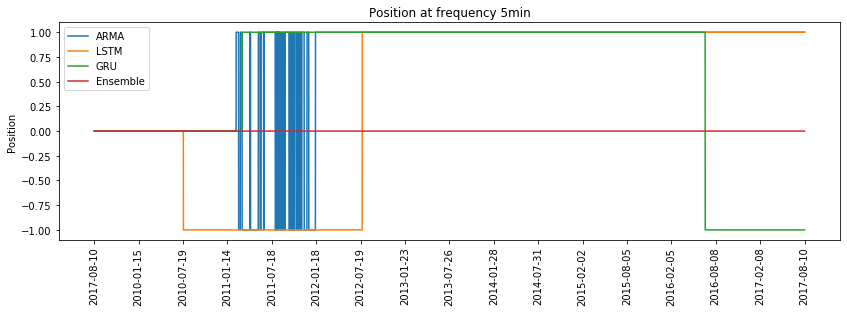

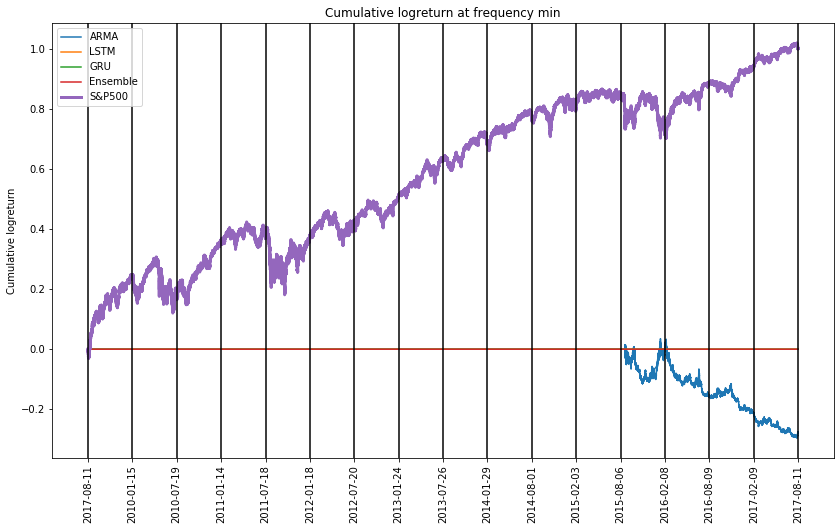

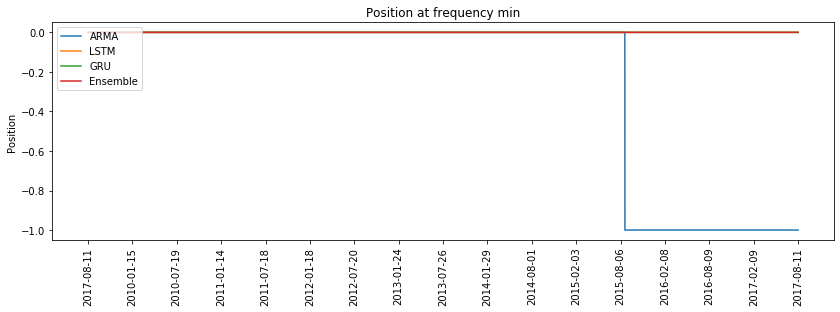

[0.         0.03248852 0.0476543  0.03272782 0.06370267]
[0.         0.         0.         0.         0.02423947]
[-0.01863984  0.          0.01183326  0.00724641  0.0124295 ]
[-0.00112665  0.0026039   0.00276249  0.          0.00714943]
[-0.00190416  0.          0.          0.          0.00330787]


In [8]:
transaction_cost = 0.003
trading_strategy = calculate_trading_strategy(predictions, transaction_cost)
cum_logr = create_cum_logr(trading_strategy, returns, transaction_cost)
vis_cum_logr(cum_logr, returns, trading_strategy, frequencies, dates, number_of_study_periods)
shapre_ratios = create_shapre_ratio(cum_logr, returns)

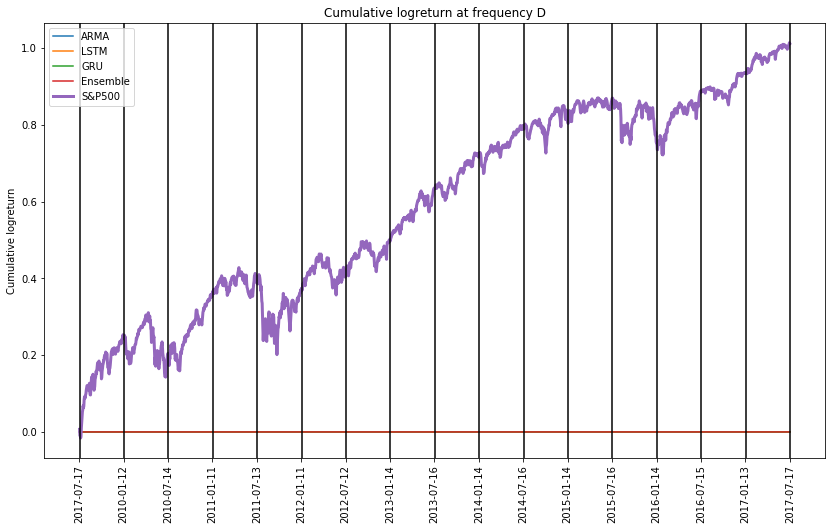

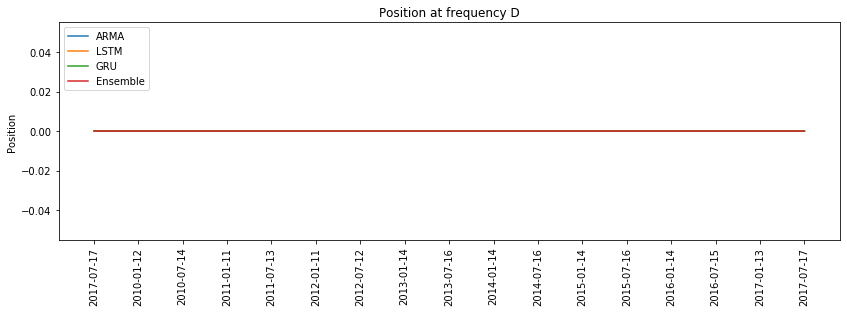

In [ ]:
transaction_cost = 0.01
trading_strategy = calculate_trading_strategy(predictions, transaction_cost)
cum_logr = create_cum_logr(trading_strategy, returns, transaction_cost)
vis_cum_logr(cum_logr, returns, trading_strategy, frequencies, dates, number_of_study_periods)
shapre_ratios = create_shapre_ratio(cum_logr, returns)

In [ ]:
import statsmodels.api as sm
i = 7
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(study_periods[0,i], lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(study_periods[0,i], lags=40, ax=ax2)# , lags=40